In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("/home/deep_rao03/3 Month/Projects/Olympics/Data/olympics_dataset.csv")

In [27]:
df.shape

(252565, 11)

In [28]:
df.tail()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze
252564,1924402,Charlie Carvell,M,Great Britain,GBR,2024,Summer,Paris,Athletics,Men's 4 x 400m Relay,Bronze


In [29]:
region_df= pd.read_csv("/home/deep_rao03/3 Month/Projects/Olympics/Data/regions.csv")

In [30]:
region_df.head()

,Unnamed: 0,NOC,region,notes
0,0,EOR,Refugee,NaN
1,1,LBN,Lebanon,NaN
2,2,SGP,Singapore,NaN
3,3,ROC,Russia,NaN
4,4,AFG,Afghanistan,NaN


In [31]:
df = df.merge(region_df,on="NOC",how='left')

In [32]:
df.shape

(252565, 14)

In [33]:
df.tail()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,Unnamed: 0,region,notes
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal,82.0,Equatorial Guinea,NaN
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal,104.0,Italy,NaN
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold,149.0,Netherlands,NaN
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze,73.0,France,NaN
252564,1924402,Charlie Carvell,M,Great Britain,GBR,2024,Summer,Paris,Athletics,Men's 4 x 400m Relay,Bronze,78.0,UK,NaN


In [34]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [35]:
df.shape

(252565, 13)

In [12]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,China,NaN
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,China,NaN
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,Denmark,NaN
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,Netherlands,NaN


In [13]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', 'Singapore', 'Uzbekistan', 'Kyrgyzstan',
       'Tajikistan', 'Japan', 'Republic of Congo', 'Switzerland',
       'Brazil', 'Monaco', 'Israel', 'Uruguay', 'Sweden', 'Sri Lanka',
       'Armenia', 'Ivory Coast', 'Keny

In [14]:
df.isnull().sum()

player_id         0
Name              0
Sex               0
Team              0
NOC               0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal             0
region           71
notes        247951
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['Medal'].unique()

array(['No medal', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [17]:
pd.get_dummies(df['Medal'], dtype=np.uint8)

,Bronze,Gold,No medal,Silver
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
252560,0,0,1,0
252561,0,0,1,0
252562,0,1,0,0
252563,1,0,0,0


In [18]:
df = pd.concat([df,pd.get_dummies(df['Medal'], dtype=np.uint8)],axis=1)

In [19]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,No medal,Silver
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,China,NaN,0,0,1,0
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,China,NaN,0,0,1,0
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,Denmark,NaN,0,0,1,0
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0,0
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,Netherlands,NaN,0,0,1,0


In [20]:
df.shape

(252565, 17)

In [21]:
# Take groupby on NOC and get the sum to find total medals won by any NOC

In [22]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2716,1539,1366
1,URS,832,635,596
2,GBR,716,813,753
3,GER,634,613,721
4,FRA,583,712,660
...,...,...,...,...
229,WIF,0,0,5
230,YEM,0,0,0
231,YAR,0,0,0
232,YMD,0,0,0


In [23]:
# some issue in data that here dataset is according to player not according to country due to which so many medals added in metal telly which we have to improve

In [24]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Event','Medal'])

In [25]:
medal_tally_df = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [26]:
medal_tally_df

,NOC,Gold,Silver,Bronze
0,USA,1113,885,782
1,URS,394,317,294
2,GBR,313,360,350
3,CHN,305,221,195
4,FRA,260,294,320
...,...,...,...,...
229,WIF,0,0,2
230,YEM,0,0,0
231,YAR,0,0,0
232,YMD,0,0,0


In [27]:
years = df['Year'].unique().tolist()

In [28]:
years.sort()

In [29]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016,
 2020,
 2024]

In [30]:
years.insert(0,'Overall')

In [31]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016,
 2020,
 2024]

In [32]:
country = df['region'].dropna().unique().tolist()

In [33]:
country.sort()

In [34]:
country.insert(0,'Overall')

In [35]:
df[(df['Year']==2024)&(df['region']=="India")]

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,No medal,Silver
237858,1536251,Tulika Maan,F,India,IND,2024,Summer,Paris,Judo,Women +78 kg,No medal,India,NaN,0,0,1,0
237860,1536368,Shubhankar Sharma,M,India,IND,2024,Summer,Paris,Golf,Men's Individual Stroke Play,No medal,India,NaN,0,0,1,0
237861,1536371,Gaganjeet Bhullar,M,India,IND,2024,Summer,Paris,Golf,Men's Individual Stroke Play,No medal,India,NaN,0,0,1,0
237875,1536522,Aditi Ashok,F,India,IND,2024,Summer,Paris,Golf,Women's Individual Stroke Play,No medal,India,NaN,0,0,1,0
237876,1536523,Diksha Dagar,F,India,IND,2024,Summer,Paris,Golf,Women's Individual Stroke Play,No medal,India,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246592,1932243,Antim Antim,F,India,IND,2024,Summer,Paris,Wrestling,Women's Freestyle 53kg,No medal,India,NaN,0,0,1,0
246594,1932431,Anshu Anshu,F,India,IND,2024,Summer,Paris,Wrestling,Women's Freestyle 57kg,No medal,India,NaN,0,0,1,0
246608,1932512,Nisha Nisha,F,India,IND,2024,Summer,Paris,Wrestling,Women's Freestyle 68kg,No medal,India,NaN,0,0,1,0
246610,1932567,Reetika Reetika,F,India,IND,2024,Summer,Paris,Wrestling,Women's Freestyle 76kg,No medal,India,NaN,0,0,1,0


In [36]:
def fetch_medal_tally(df,year,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Event','Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df


    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region']==country]


    if year !='Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year']==year]


    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag==1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x  = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']

    return x

# OverAll Analysis

1. No. of editions
2. No. of cities
3. No. of events.sports
4. No. of athletes
5. participating nations

In [48]:
df['Year'].unique().shape[0]-1

30

In [51]:
df['City'].unique().shape[0]

23

In [55]:
df['Sport'].unique().shape[0]

76

In [56]:
df['Event'].unique().shape

(1041,)

In [58]:
df['Name'].unique().shape

(129992,)

In [59]:
df['region'].unique().shape

(208,)

In [84]:
nation_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('count')

In [85]:
nation_over_time.rename(columns={'Year':'Edition','count':"No of Countries"},inplace=True)
nation_over_time_clean = nation_over_time.groupby('Edition')['No of Countries'].sum().reset_index()

In [86]:
nation_over_time

,Edition,No of Countries
30,1896,12
29,1904,14
28,1906,20
27,1908,22
25,1912,29
26,1920,29
24,1900,31
23,1924,45
22,1928,46
21,1932,47


In [87]:
import plotly.express as px

In [91]:
fig = px.line(nation_over_time_clean, x='Edition', y='No of Countries')
fig.show()


In [97]:
Event_over_time = df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('count')


In [98]:
Event_over_time

,Year,count
30,1896,43
29,1906,74
28,1900,90
27,1904,95
26,1912,107
25,1908,109
24,1928,122
22,1924,131
23,1932,131
21,1952,149


In [99]:
Event_over_time.rename(columns={'Year':'Edition','count':'No of Events'},inplace=True)

In [100]:
Event_over_time

,Edition,No of Events
30,1896,43
29,1906,74
28,1900,90
27,1904,95
26,1912,107
25,1908,109
24,1928,122
22,1924,131
23,1932,131
21,1952,149


In [103]:
Event_over_time = Event_over_time.groupby('Edition')['No of Events'].sum().reset_index()
fig = px.line(Event_over_time, x='Edition', y='No of Events')
fig.show()


In [104]:
import seaborn as sns

In [109]:
x = df.drop_duplicates(['Year','Sport','Event'])
x = x.pivot_table(index ='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int)

In [119]:
import matplotlib.pyplot as plt

<Axes: xlabel='Year', ylabel='Sport'>

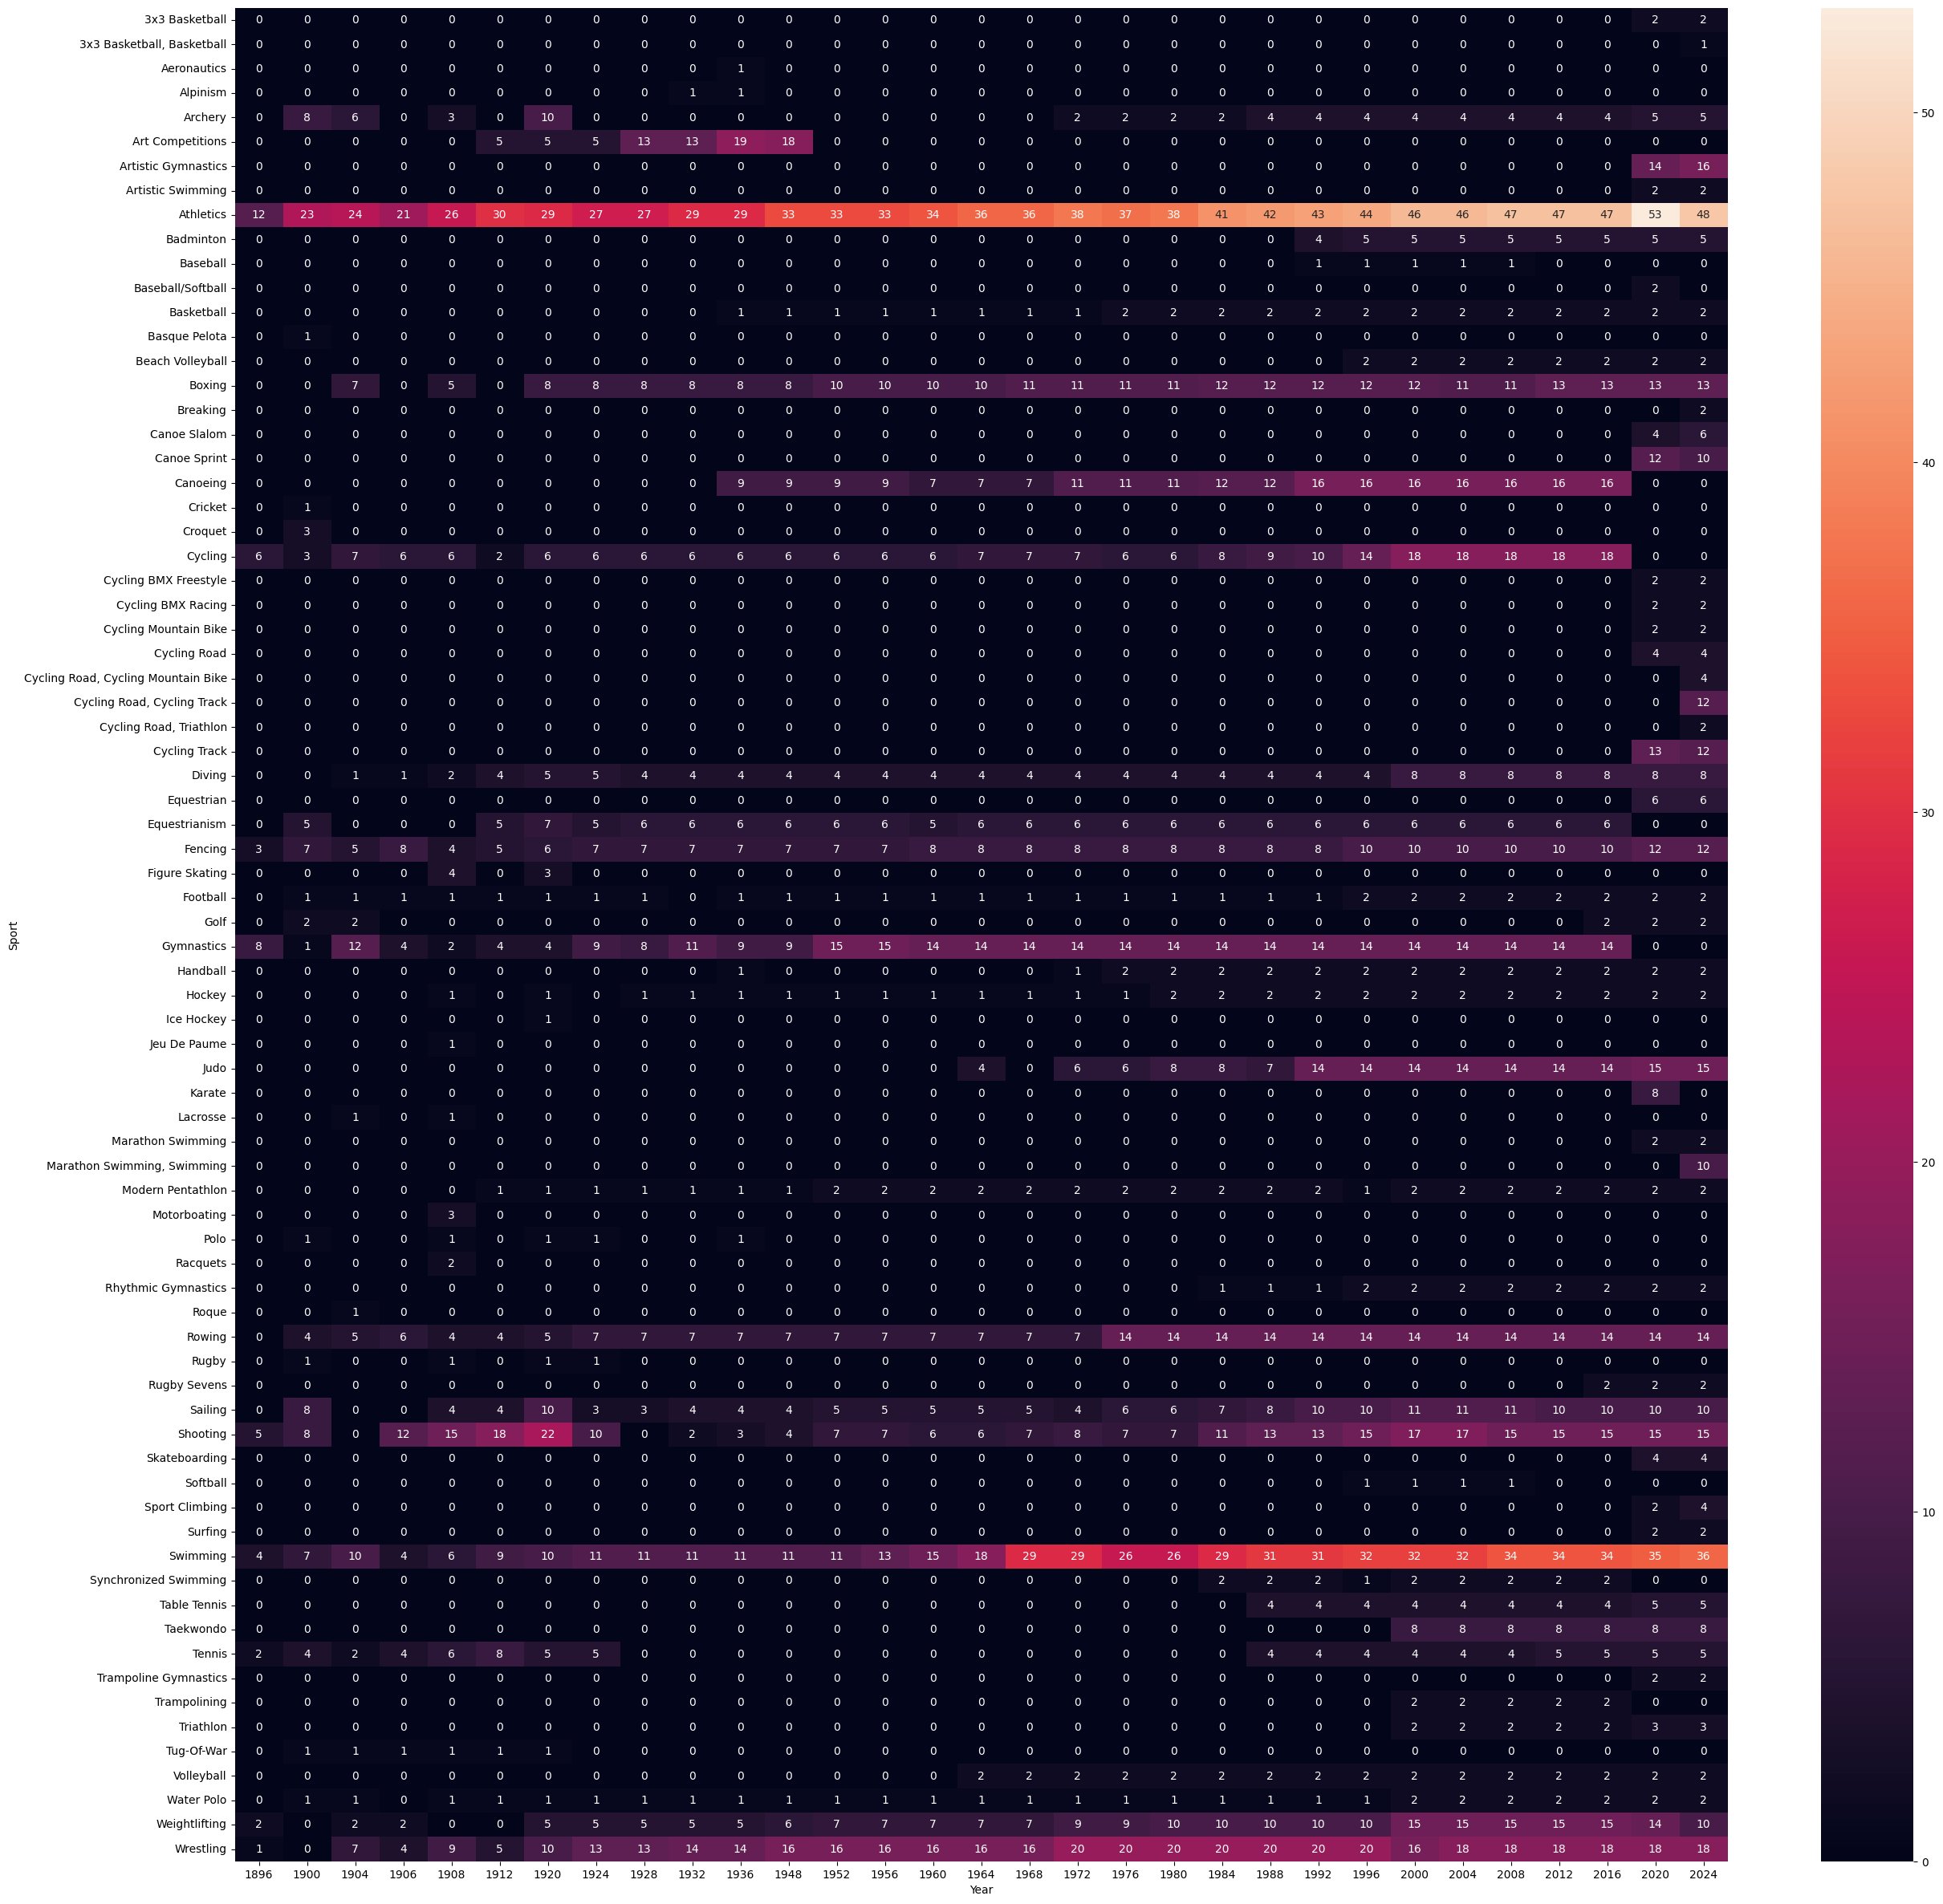

In [121]:
plt.figure(figsize=(30,30))
sns.heatmap(x,annot=True)

In [122]:
# Most successfull athletes

In [50]:
def most_successfull(df, sport):
    temp_df = df[df['Medal'] != 'No medal'].reset_index(drop=True)

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    # Count medals
    p = temp_df['Name'].value_counts().reset_index()
    p.rename(columns={'count':'Medals'},inplace=True)
    p = p.head(15)
    p = p.merge(temp_df,on='Name',how='left')[['Name','Medals','Sport','region']]
    p = p.drop_duplicates('Name')

    p = p.sort_values(by='Medals', ascending=False).reset_index(drop=True)
    p.index += 1
    p.index.name = 'Rank'

    return p

In [51]:
most_successfull(df,'Overall')

,Name,Medals,Sport,region
Rank,,,,
1,Michael Ii,28,Swimming,USA
2,Larysa (diriy-),18,Gymnastics,Russia
3,Charles Jr.,16,Athletics,USA
4,Nikolay Andrianov,15,Gymnastics,Russia
5,Takashi Ono,13,Gymnastics,Japan
6,Borys Shakhlin,13,Gymnastics,Russia
7,Edoardo Mangiarotti,13,Fencing,Italy
8,Gustaf Carlberg,13,Shooting,Sweden
9,John Jr.,13,Sailing,USA


In [125]:
df = df[df['Medal'] != 'No medal'].reset_index(drop=True)


,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,No medal,Silver
0,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0,0
1,37,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0,0
2,38,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0,0
3,41,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1,0,0,0
4,42,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0,1,0,0


# CountryWise Analysis

1. CountryWise medal tally per year(line plot)
2. Which countries are good at heatmap 
3. Most Successfuk Athletes (Top 10)

In [57]:
temp_df = df[df['Medal']!= 'No medal'].reset_index()

In [58]:
temp_df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Event','Medal'],inplace=True)

In [59]:
temp_df

,level_0,index,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes
0,0,3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
1,1,12,37,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
2,2,13,38,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
3,3,15,41,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
4,4,16,42,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38792,38792,252331,1981760,Hasrat Jafarov,M,Azerbaijan,AZE,2024,Summer,Paris,Wrestling,Men's Greco-Roman 67kg,Bronze,Azerbaijan,NaN
38793,38793,252336,1981785,Magomedkhan Magomedov,M,Azerbaijan,AZE,2024,Summer,Paris,Wrestling,Men's Freestyle 97kg,Bronze,Azerbaijan,NaN
38797,38797,252367,2493835,Alizadeh Kimia,F,Bulgaria,BUL,2024,Summer,Paris,Taekwondo,Women -57kg,Bronze,Bulgaria,NaN
38798,38798,252390,3429662,Chermen Valiev,M,Albania,ALB,2024,Summer,Paris,Wrestling,Men's Freestyle 74kg,Bronze,Albania,NaN


In [64]:
new_df = temp_df[temp_df['region']=='India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [62]:
final_df

,Year,Medal
0,1900,2
1,1928,1
2,1932,1
3,1936,1
4,1948,1
5,1952,2
6,1956,1
7,1960,1
8,1964,1
9,1968,1


In [63]:
final_df.rename(columns={'Year':'Edition'},inplace=True)

In [51]:
import plotly.express as px
import matplotlib.pyplot as plt

In [53]:
fig = px.line(final_df,x='Edition',y='Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

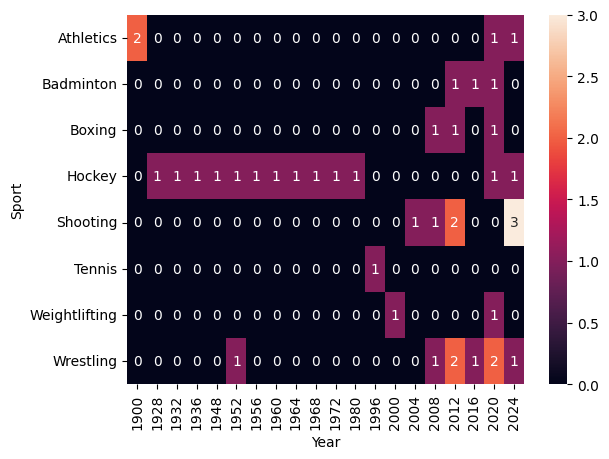

In [71]:
sns.heatmap(new_df.pivot_table(index='Sport',columns = 'Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [68]:
import seaborn as sns

In [ ]:
def most_successfull_top_10_from_a_country(df, country):
    temp_df = df[df['Medal'] != 'No medal'].reset_index(drop=True)
    temp_df = temp_df[temp_df['region'] == country]

    # Count medals
    p = temp_df['Name'].value_counts().reset_index()
    p.rename(columns={'count':'Medals'},inplace=True)
    p = p.head(10)
    p = p.merge(temp_df,on='Name',how='left')[['Name','Medals','Sport']]
    p = p.drop_duplicates('Name')

    p = p.sort_values(by='Medals', ascending=False).reset_index(drop=True)
    p.index += 1
    p.index.name = 'Rank'

    return p

In [75]:
most_successfull(df,'India')

,Name,Medals,Sport,region
Rank,,,,
1,Leslie Claudius,4,Hockey,India
2,Udham Kular,4,Hockey,India
3,Dhyan Bais,3,Hockey,India
4,Richard Allen,3,Hockey,India
5,Victor Peter,3,Hockey,India
6,Balbir Singh,3,Hockey,India
7,Shankar Laxman,3,Hockey,India
8,Ranganathan Francis,3,Hockey,India
9,Harbinder Chimni,3,Hockey,India


In [76]:
import plotly.figure_factory as ff

In [89]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [90]:
athlete_df = pd.concat((athlete_df,pd.get_dummies(athlete_df['Sex'], dtype=np.uint8)),axis=1)

In [92]:
athlete_df.drop(columns='F')

,index,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes,M
0,3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,1
1,12,37,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1
3,15,41,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1
8,33,79,Ragnhild Aamodt,F,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN,0
9,37,86,Alf Aanning,M,Norway,NOR,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver,Norway,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38811,252546,4979557,Isabella Whittaker,F,United States,USA,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Silver,USA,NaN,0
38812,252550,4979564,Quincy Wilson,M,United States,USA,2024,Summer,Paris,Athletics,Men's 4 x 400m Relay,Gold,USA,NaN,1
38814,252556,4980004,van Anne,F,Netherlands,NED,2024,Summer,Paris,Athletics,Women's 4 x 400m Relay,Silver,Netherlands,NaN,0
38815,252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold,Netherlands,NaN,1


# Winter Olympics

In [168]:
winter_df = pd.read_csv("/home/deep_rao03/3 Month/Projects/Olympics/Data/Athletes_winter_games.csv")

In [169]:
winter_df.sample(5)

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
38960,218529,Shim Seok-Hui,F,17.0,South Korea,KOR,2014 Winter,2014,Winter,Sochi,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres...",Gold
26699,148796,Eero Antero Mntyranta,M,26.0,Finland,FIN,1964 Winter,1964,Winter,Innsbruck,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,Gold
48253,269971,Daniela Zini,F,24.0,Italy,ITA,1984 Winter,1984,Winter,Sarajevo,Alpine Skiing,Alpine Skiing Women's Slalom,NaN
40483,226636,Jnos Spisk,M,22.0,Hungary,HUN,1984 Winter,1984,Winter,Sarajevo,Biathlon,Biathlon Men's 20 kilometres,NaN
16590,96961,Lukas Hofer,M,24.0,Italy,ITA,2014 Winter,2014,Winter,Sochi,Biathlon,Biathlon Men's 12.5 kilometres Pursuit,NaN


In [170]:
region_df= pd.read_csv("/home/deep_rao03/3 Month/Projects/Olympics/Data/regions.csv")

In [173]:
def preprocess(df,region_df):

    # merge with region_df
    df = df.merge(region_df,on='NOC',how='left')

    # drop one extra column named as Unnamed:0
    df.drop(columns=['Unnamed: 0_x','Unnamed: 0_y','Age','notes'],inplace=True)

    # drop duplicate values
    df.drop_duplicates(inplace=True)

    # one hot encoding medals
    df = pd.concat([df,pd.get_dummies(df['Medal'], dtype=np.uint8)],axis=1)
    df['Medal'] = df['Medal'].fillna('No medal') 

    return df

In [174]:
winter_df=preprocess(winter_df,region_df)

In [175]:
winter_df

,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No medal,Netherlands,0,0,0
1,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No medal,Netherlands,0,0,0
2,Christine Jacoba Aaftink,F,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No medal,Netherlands,0,0,0
3,Christine Jacoba Aaftink,F,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No medal,Netherlands,0,0,0
4,Christine Jacoba Aaftink,F,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No medal,Netherlands,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48559,Andrzej ya,M,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No medal,Poland,0,0,0
48560,Piotr ya,M,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No medal,Poland,0,0,0
48561,Piotr ya,M,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No medal,Poland,0,0,0
48562,Tomasz Ireneusz ya,M,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No medal,Poland,0,0,0


In [176]:
def most_successfull_countryWise(df, country):
    temp_df = df[df['Medal'] != 'No medal'].reset_index(drop=True)
    temp_df = temp_df[temp_df['region'] == country]

    # Count medals
    p = temp_df['Name'].value_counts().reset_index()
    p.rename(columns={'count':'Medals'},inplace=True)
    p = p.head(10)
    p = p.merge(temp_df,on='Name',how='left')[['Name','Medals','Sport']]
    p = p.drop_duplicates('Name')

    p = p.sort_values(by='Medals', ascending=False).reset_index(drop=True)
    p.index += 1
    p.index.name = 'Rank'

    return p

In [177]:
most_successfull_countryWise(winter_df,'Albania')

,Name,Medals,Sport
Rank,,,


In [178]:
def yearwise_medal_tally(df,country):

    temp_df = df[df['Medal']!= 'No medal'].reset_index()
    temp_df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Event','Medal'],inplace=True)
    new_df = temp_df[temp_df['region']==country]
    final_df = new_df.groupby('Year').count()['Medal'].reset_index()
    final_df.rename(columns={'Year':'Edition'},inplace=True)

    return final_df

In [180]:
yearwise_medal_tally(winter_df,"USA")

,Edition,Medal
0,1924,4
1,1928,6
2,1932,12
3,1936,4
4,1948,8
5,1952,11
6,1956,7
7,1960,10
8,1964,7
9,1968,5


In [181]:
def country_event_heatmap(df,country):

    temp_df = df[df['Medal']!= 'No medal'].reset_index()
    temp_df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Event','Medal'],inplace=True)
    new_df = temp_df[temp_df['region']==country]
    pt = new_df.pivot_table(index='Sport',columns = 'Year',values='Medal',aggfunc='count').fillna(0)

    return pt

In [185]:
p = country_event_heatmap(winter_df,'Albenia')

In [186]:
sns.heatmap(p,annot=True)

ValueError: zero-size array to reduction operation fmin which has no identity